In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

### Questions to ask: <b>
* How biased is ratemyprofessor compared to FCE?
* undergraduate vs graduate

In [327]:
df = pd.read_csv("fce.csv")
df.head()

,Year,Semester,College,Dept,Course ID,Section,Name,Course Name,Level,Possible Respondents,...,Hrs Per Week 8,Interest in student learning,Clearly explain course requirements,Clear learning objectives & goals,Instructor provides feedback to students to improve,Demonstrate importance of subject matter,Explains subject matter of course,Show respect for all students,Overall teaching rate,Overall course rate
0,2019,Fall,College of Fine Arts,ARC,48358,B1,"BEN-ALON, RACHEL",EARTHEN BUILDING,Undergraduate,26,...,NaN,4.79,4.62,4.57,4.69,4.57,4.71,4.93,4.71,4.71
1,2019,Fall,College of Fine Arts,ARC,48358,A1,"BEN-ALON, RACHEL",EARTHEN BUILDING,Undergraduate,8,...,NaN,5.00,5.00,4.83,4.83,5.00,4.83,5.00,4.33,4.17
2,2019,Fall,College of Fine Arts,ARC,48689,A1,"KIM, MAN",DIGI SKLLS WRKSHP,Graduate,14,...,NaN,4.75,4.63,4.75,4.88,4.50,4.75,4.63,4.75,4.38
3,2019,Fall,College of Fine Arts,ARC,48753,A1,"DAWKINS, MARANTHA",INTRO UD MED,Graduate,14,...,NaN,4.00,3.00,3.60,4.40,3.60,3.40,4.60,3.60,3.20
4,2019,Fall,College of Fine Arts,ART,60131,A1,"GURYSH, STEVEN",3D MEDIA STUDIO I,Undergraduate,11,...,NaN,4.88,4.63,4.86,4.86,4.57,4.86,5.00,4.86,4.71


First let us clean the data by checking the NaN values of each column as shown below. There also seem to be one "Name" row with a NaN that seem to be an outlier, so let's drop this row. There also seem to be a lot of NaN values for Hrs Per Week 5 and Hrs Per Week 8, so let's drop these two columns and replace the other column with NaN values with the mean.

In [328]:
print(df.isna().sum())

Year                                                       0
Semester                                                   0
College                                                    0
Dept                                                       0
Course ID                                                  0
Section                                                    0
Name                                                       1
Course Name                                                0
Level                                                      0
Possible Respondents                                       0
Num Respondents                                            0
Response Rate %                                            0
Hrs Per Week                                           20635
Hrs Per Week 5                                         37504
Hrs Per Week 8                                         42744
Interest in student learning                            1661
Clearly explain course r

In [329]:
df = df[pd.notnull(df['Name'])]
df = df[df["College"] != "Teaching Assistants"]
if "Hrs Per Week 5" in df.columns and "Hrs Per Week 8" in df.columns:
    df = df.drop(columns=["Hrs Per Week 5", "Hrs Per Week 8"])

In [330]:
df.dtypes

Year                                                     int64
Semester                                                object
College                                                 object
Dept                                                    object
Course ID                                               object
Section                                                 object
Name                                                    object
Course Name                                             object
Level                                                   object
Possible Respondents                                     int64
Num Respondents                                          int64
Response Rate %                                          int64
Hrs Per Week                                           float64
Interest in student learning                           float64
Clearly explain course requirements                    float64
Clear learning objectives & goals                      

In [331]:
lst = df.columns[df.isnull().any()].tolist()
df[lst] = df[lst].fillna(df[lst].mean())
print(df.isna().sum())

Year                                                   0
Semester                                               0
College                                                0
Dept                                                   0
Course ID                                              0
Section                                                0
Name                                                   0
Course Name                                            0
Level                                                  0
Possible Respondents                                   0
Num Respondents                                        0
Response Rate %                                        0
Hrs Per Week                                           0
Interest in student learning                           0
Clearly explain course requirements                    0
Clear learning objectives & goals                      0
Instructor provides feedback to students to improve    0
Demonstrate importance of subje

Now that we have cleaned up the data, let's ask some small questions about this dataset.
* How is the average FCE per college for Graduate and Undergraduate?
* Which column is most correlated to the Overall course rate?

In [332]:
df_grad = df[df['Level'] == "Graduate"]
df_undergrad = df[df['Level'] == "Undergraduate"]
print(len(df_grad), len(df_undergrad))

20070 29465


In [333]:
avg_grad_fce = df_grad.groupby(["Year", "College"], as_index=False).mean()
avg_undergrad_fce = df_undergrad.groupby(["Year", "College"], as_index=False).mean()
# order = {"College": ["Carnegie Mellon University",
#                      "Carnegie Institute of Technology",
#                      "College of Fine Arts",
#                      "Dietrich College of Humanities and Social Sciences",
#                      "Heinz College",
#                      "Mellon College of Science",
#                      "Tepper School of Business",
#                      "School of Computer Science"]}
# Not working

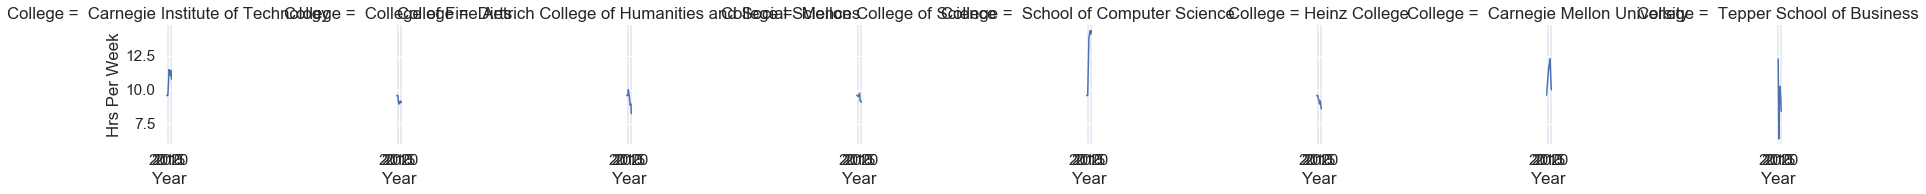

In [334]:
avg_grad_fce = avg_grad_fce.groupby(["Year", "College"], as_index=False).mean()
avg_grad_fce = avg_grad_fce[["Year", "College","Hrs Per Week"]]

g = sns.FacetGrid(avg_grad_fce, col="College")
g.map(plt.plot,"Year", "Hrs Per Week")
g.add_legend()

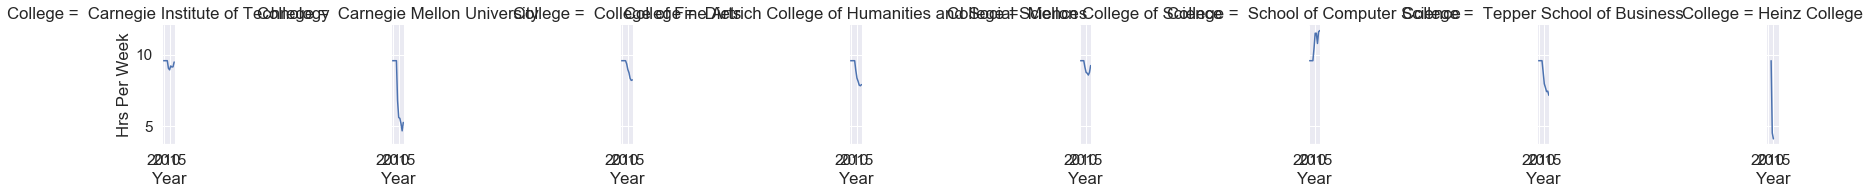

In [335]:
avg_undergrad_fce = avg_undergrad_fce.groupby(["Year", "College"], as_index=False).mean()
avg_undergrad_fce = avg_undergrad_fce[["Year", "College","Hrs Per Week"]]

g = sns.FacetGrid(avg_undergrad_fce, col="College")
g.map(plt.plot,"Year", "Hrs Per Week")
g.add_legend()

We can find some interesting results based on the graphs above. 
* For graduates at CMU, the FCE seem to be having an increasing trend over the years, peaking around 2017, and then gradually decrease till now. Whereas for the undergrads at CMU, the FCE seem to be decreasing, with a slight increase at 2019. 
* The School of Computer Science has the greatest increase, with an approximately 5 hours of increase from 2013 to 2019 for the graduates(9hr -> 14hr), and approximately 3 hours of increase from (9hr -> 12hr) <br>
Cite: this dataset is also used in CMU Data Science Club's Challenges, so this part (FCE by college) might appear similar. <br>
Now let's do some analysis on the **correlation of the columns**.

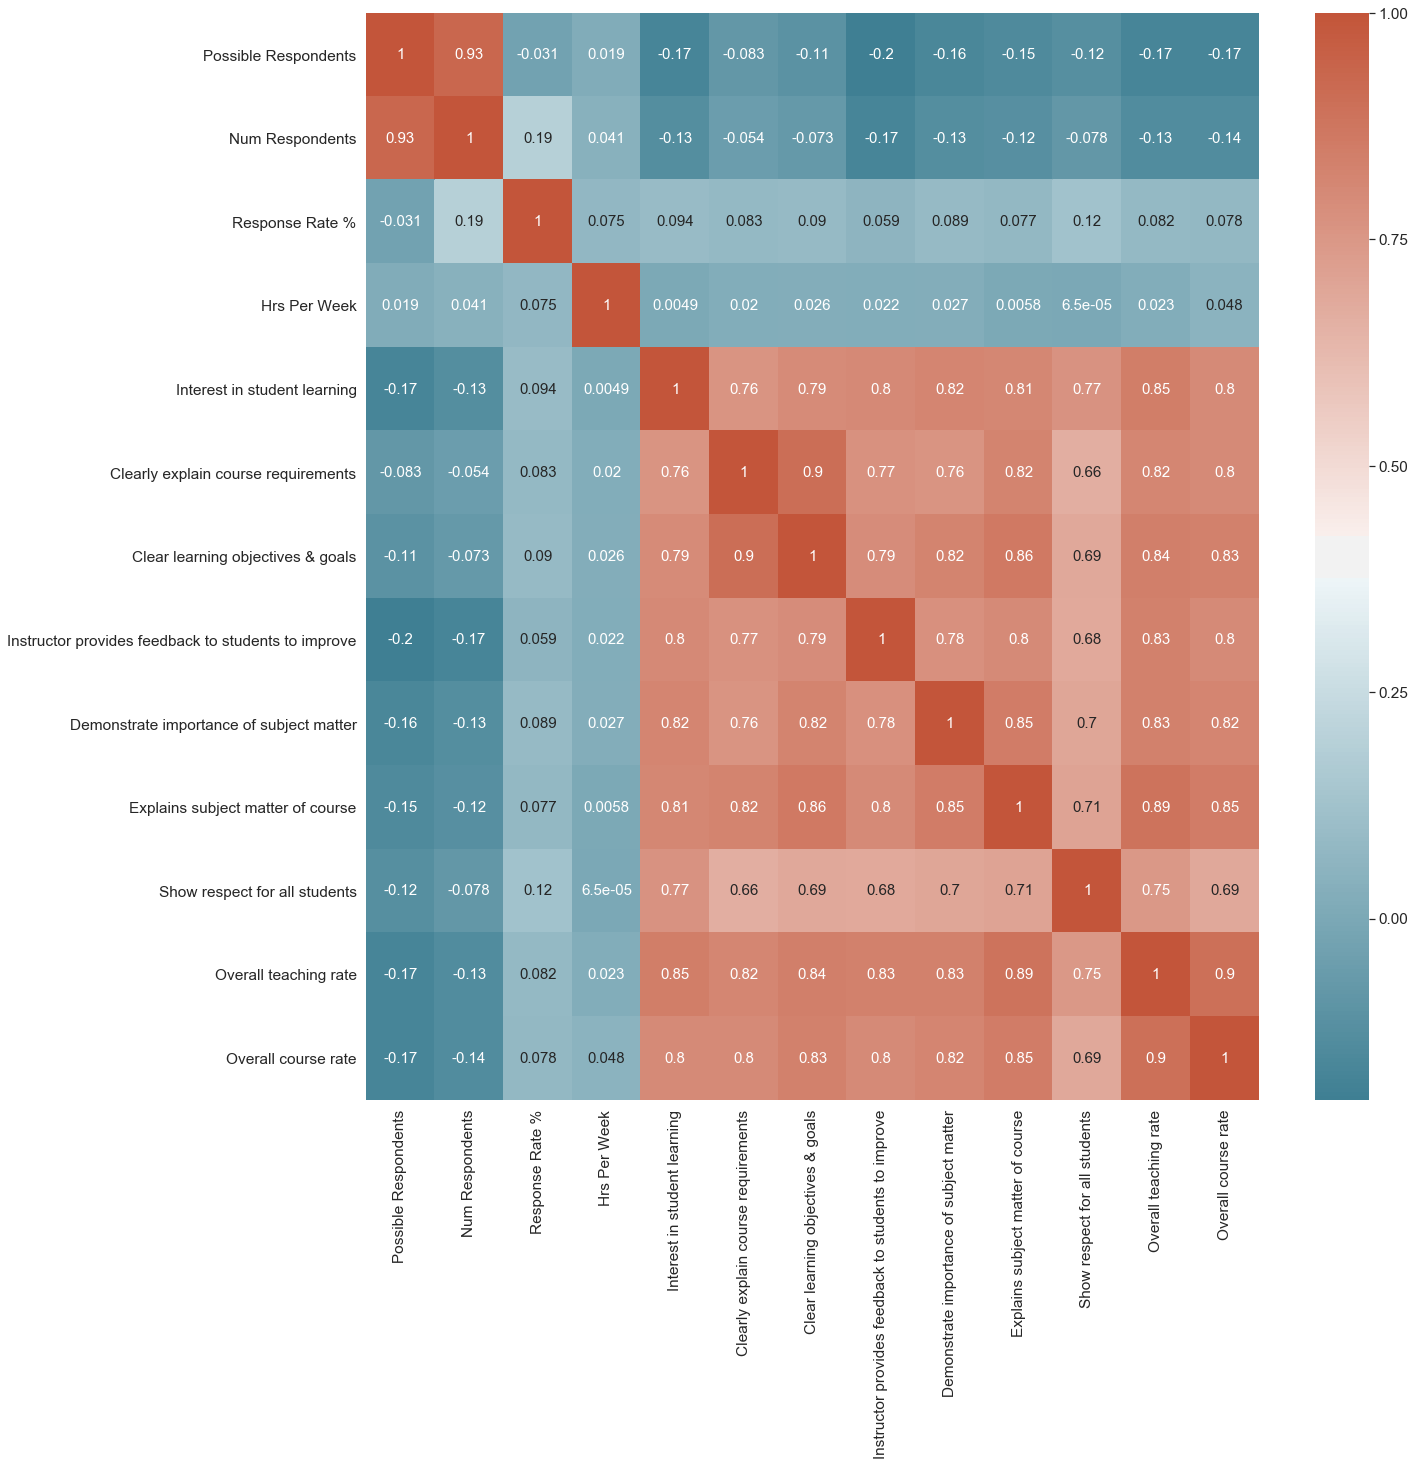

In [336]:
# sns.palplot(sns.color_palette("BrBG", 10))
plt.figure(figsize = (20,20))
corr_lst = list(df.select_dtypes(include=['int', 'float']).columns)
corr_df = df[corr_lst]
corr_df.drop("Year", axis=1, inplace=True)
corr = corr_df.corr()
# ax = sns.heatmap(corr, cmap="YlGnBu",annot=True)
sns.set(font_scale=1.4)
ax = sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True),
                 annot=True, annot_kws={"size": 15})

In [337]:
print(ttest_ind(df['Overall teaching rate'], df["Overall course rate"]))
print(ttest_ind(df['Explains subject matter of course'], df["Overall course rate"]))

Ttest_indResult(statistic=17.30246219571182, pvalue=5.6568799702218715e-67)
Ttest_indResult(statistic=22.44916459738248, pvalue=2.4761995265321016e-111)


It seems that the `overall teaching rate` is highly correlated with `overall course rate` and `Explains subject matter of course`. <br>
So we calculate the statistic significance, both of the p-values are < 0.05, so they're statistically significant.

### Potentially fit a model for Overall Teaching Rate here?

In [338]:
# df_prof_mean = df.groupby("Name").mean()
# df_prof_mean

### Question: Does course get higher course rating with higher levels?

In [339]:
df_dept = df.copy()
def f(x):
    # There are different course listing in the past
    # such as "FA14-12-100" for CIT
    # so here we preprocess these data and create a column for the course ID level
    if x.startswith("F"):
        lst = x.split("-")
        x = lst[-2]+lst[-1]
    x = x[-3:]
    x = int(x)//100
    return (x)
df_dept["Course ID Level"] = df_dept["Course ID"].apply(f)

In [340]:
df_dept_plot = df_dept.groupby(["College", "Dept", "Course ID Level"], as_index=False).mean()
df_dept_plot_selected = df_dept_plot[["College", "Dept", "Course ID Level", "Overall course rate"]]
df_dept_plot_selected["College"].unique()

array([' Carnegie Institute of Technology', ' Carnegie Mellon University',
       ' College of Fine Arts',
       ' Dietrich College of Humanities and Social Sciences',
       ' Mellon College of Science', ' School of Computer Science',
       ' Tepper School of Business', 'Heinz College'], dtype=object)

In [341]:
df_dept_plot_SCS = df_dept_plot_selected.loc[df_dept_plot_selected["College"] == " School of Computer Science"]
min_ID = df_dept_plot_SCS["Course ID Level"].min()
max_ID = df_dept_plot_SCS["Course ID Level"].max()
print("For SCS,","min_ID =", min_ID, "max_ID=", max_ID)

For SCS, min_ID = 0 max_ID= 9


In [342]:
df_dept_plot_SCS[df_dept_plot_SCS["Dept"]=="SCS"].head()
# The "SCS" department seems buggy - it only has one course ID level
# Let's drop it.

,College,Dept,Course ID Level,Overall course rate
328,School of Computer Science,SCS,1,4.345


In [343]:
df_dept_plot_SCS = df_dept_plot_SCS[df_dept_plot_SCS["Dept"] !="SCS"]

0.328653952849981

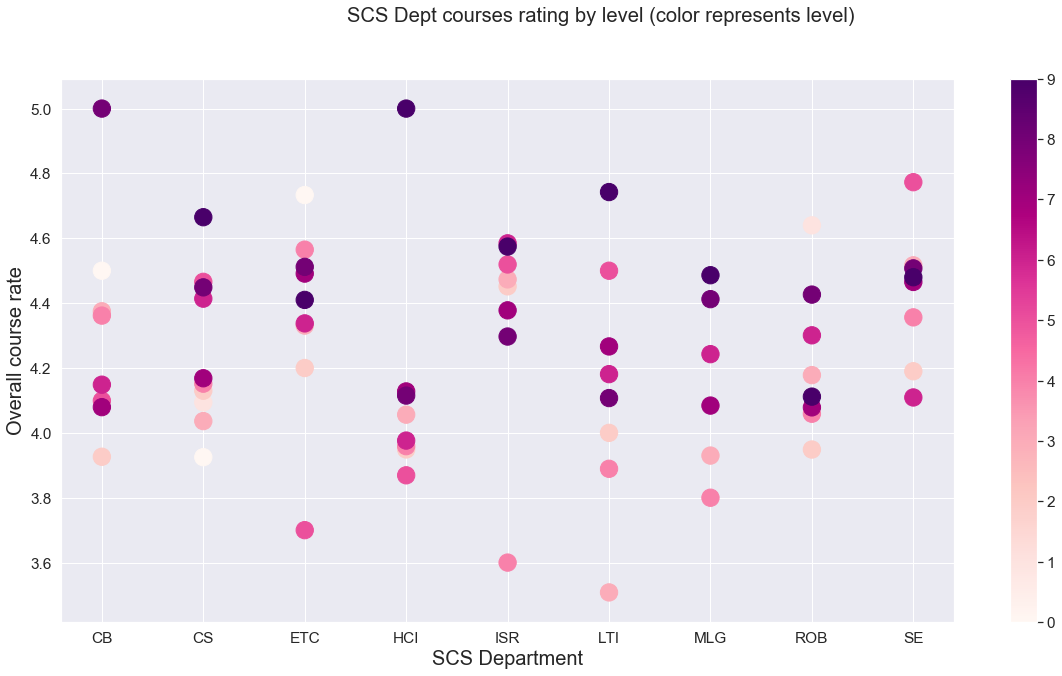

In [344]:
# df_dept_plot_CIT.plot(x="Dept", y="Overall course rate", kind="scatter")
plt_size = 10
fig, ax = plt.subplots(figsize=(2*plt_size,plt_size))
fig.suptitle('SCS Dept courses rating by level (color represents level)')
ax.set_ylabel("Overall course rate", fontsize=2*plt_size)
ax.set_xlabel("SCS Department", fontsize=2*plt_size)
ax.scatter(df_dept_plot_SCS["Dept"], 
           df_dept_plot_SCS["Overall course rate"], 
           c = df_dept_plot_SCS["Course ID Level"], 
           cmap = "RdPu",s=plt_size*30)

# cite from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=9))
# need to "fake" an array for, otherwise throws an error
sm._A = []
plt.colorbar(sm)
### correlation between the two columns, overall course rate and course level ID
df_dept_plot_SCS['Course ID Level'].corr(df_dept_plot_SCS["Overall course rate"])

It seems that in most departments in SCS, the highest level class tend to have higher rating among all the level of classes. The overall correlation between the `Course ID Level` and the `Overall course rate` is about 0.33.

In [345]:
# debugging
# df_dept_plot_SCS[df_dept_plot_SCS["Dept"]=="ISR"]

### Let's do the same plot for the other colleges!

For Heinz, min_ID = 4 max_ID= 9
Correlation between Heinz's Course ID Level and Overall Course Rating is -0.04863732521634344


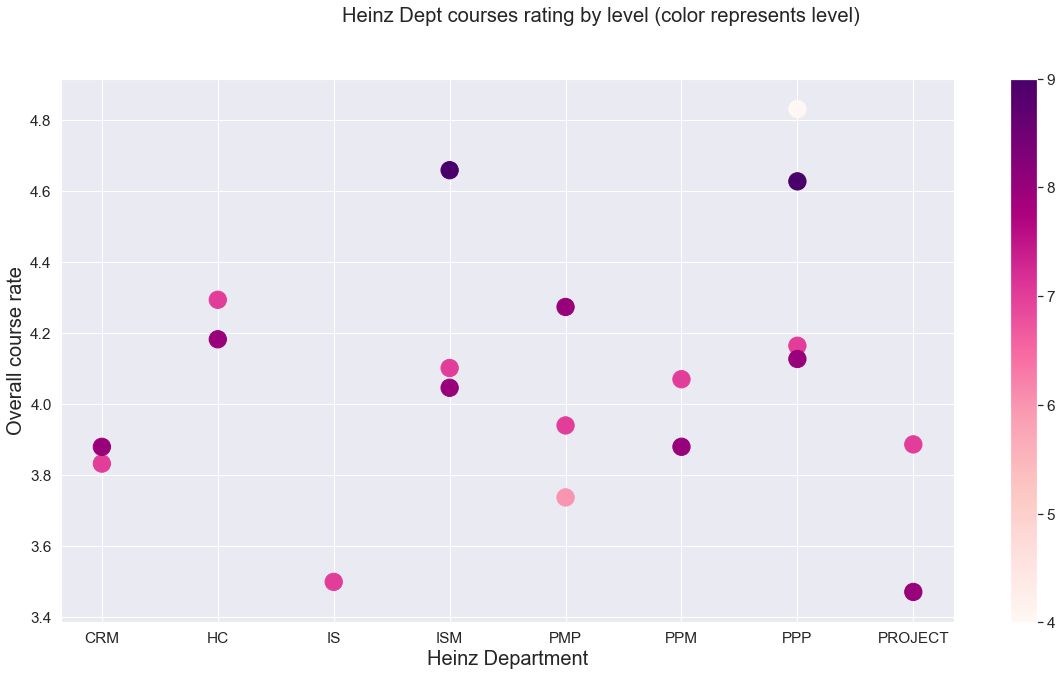

In [346]:
df_dept_plot_Heinz = df_dept_plot_selected.loc[df_dept_plot_selected["College"] == "Heinz College"]
df_dept_plot_Heinz
min_ID = df_dept_plot_Heinz["Course ID Level"].min()
max_ID = df_dept_plot_Heinz["Course ID Level"].max()
print("For Heinz,","min_ID =", min_ID, "max_ID=", max_ID)
plt_size = 10
fig, ax = plt.subplots(figsize=(2*plt_size,plt_size))
fig.suptitle('Heinz Dept courses rating by level (color represents level)')
ax.set_ylabel("Overall course rate", fontsize=2*plt_size)
ax.set_xlabel("Heinz Department", fontsize=2*plt_size)
ax.scatter(df_dept_plot_Heinz["Dept"], 
           df_dept_plot_Heinz["Overall course rate"], 
           c = df_dept_plot_Heinz["Course ID Level"], 
           cmap = "RdPu",s=plt_size*30)

# cite from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=min_ID, vmax=max_ID))
# need to "fake" an array for, otherwise throws an error
sm._A = []
plt.colorbar(sm)
print("Correlation between Heinz's Course ID Level and Overall Course Rating is",\
df_dept_plot_Heinz['Course ID Level'].corr(df_dept_plot_Heinz["Overall course rate"]))

For Dietrich, min_ID = 0 max_ID= 9
Correlation between Dietrich's Course ID Level and Overall Course Rating is 0.47525736013192343


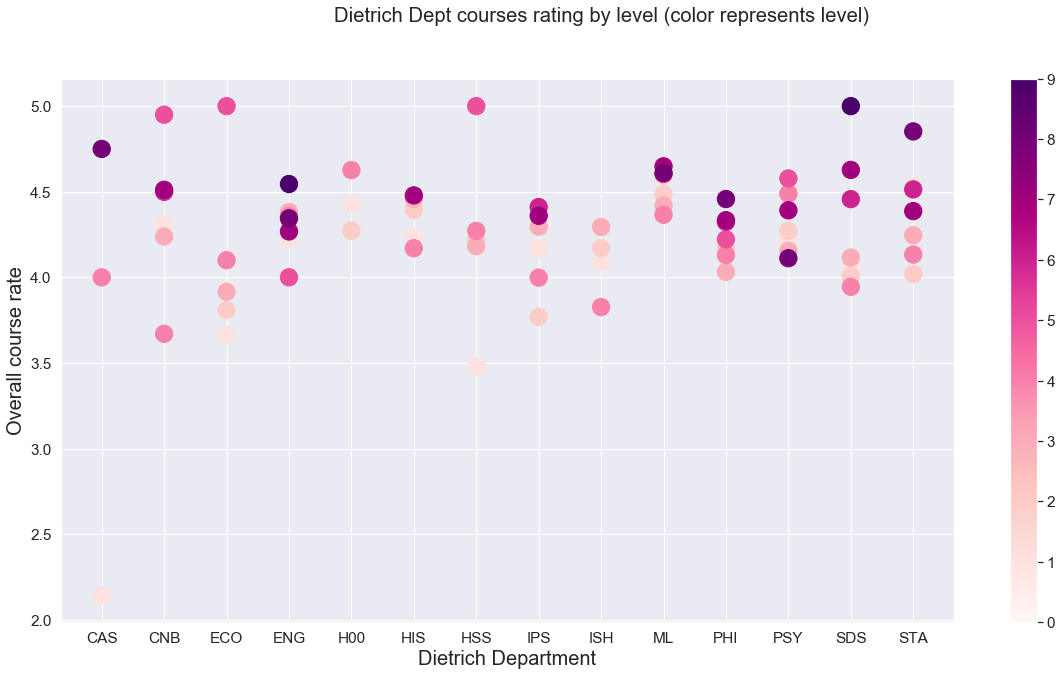

In [347]:
df_dept_plot_Dietrich = df_dept_plot_selected.loc[df_dept_plot_selected["College"] == " Dietrich College of Humanities and Social Sciences"]
df_dept_plot_Dietrich
min_ID = df_dept_plot_Dietrich["Course ID Level"].min()
max_ID = df_dept_plot_Dietrich["Course ID Level"].max()
print("For Dietrich,","min_ID =", min_ID, "max_ID=", max_ID)
plt_size = 10
fig, ax = plt.subplots(figsize=(2*plt_size,plt_size))
fig.suptitle('Dietrich Dept courses rating by level (color represents level)')
ax.set_ylabel("Overall course rate", fontsize=2*plt_size)
ax.set_xlabel("Dietrich Department", fontsize=2*plt_size)
ax.scatter(df_dept_plot_Dietrich["Dept"], 
           df_dept_plot_Dietrich["Overall course rate"], 
           c = df_dept_plot_Dietrich["Course ID Level"], 
           cmap = "RdPu",s=plt_size*30)

# cite from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=min_ID, vmax=max_ID))
# need to "fake" an array for, otherwise throws an error
sm._A = []
plt.colorbar(sm)
print("Correlation between Dietrich's Course ID Level and Overall Course Rating is",\
      df_dept_plot_Dietrich['Course ID Level'].corr(df_dept_plot_Dietrich["Overall course rate"]))

For CFA, min_ID = 0 max_ID= 9
Correlation between CFA's Course ID Level and Overall Course Rating is -0.06973626556933861


Ttest_indResult(statistic=0.12131331945952992, pvalue=0.9036725426336697)

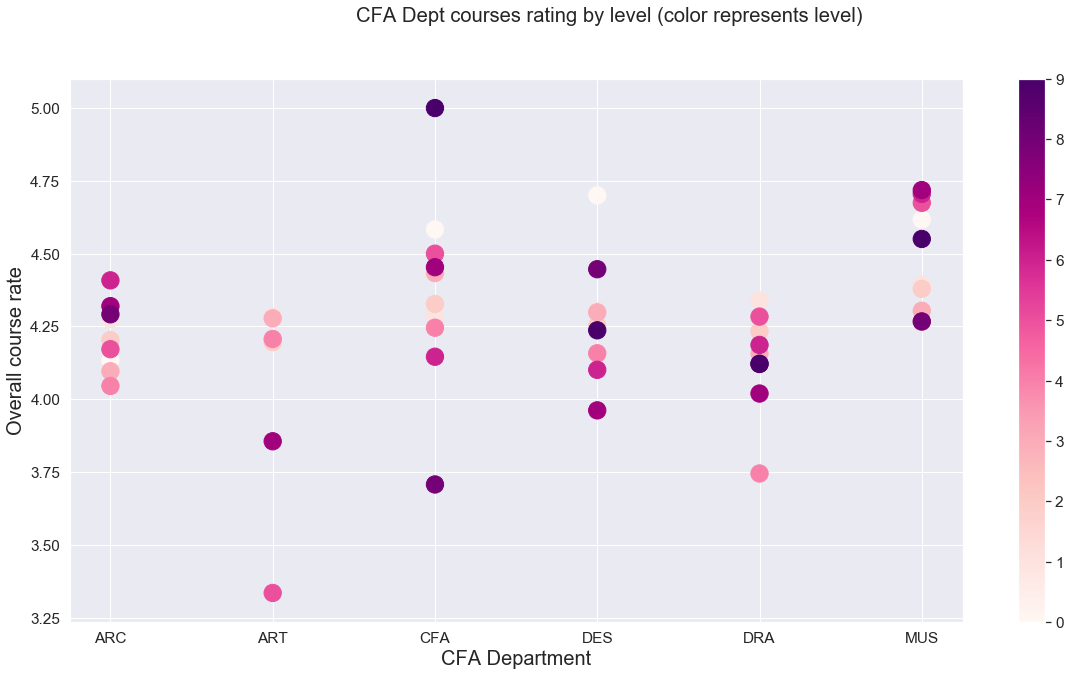

In [348]:
df_dept_plot_CFA = df_dept_plot_selected.loc[df_dept_plot_selected["College"] == " College of Fine Arts"]
df_dept_plot_CFA
min_ID = df_dept_plot_CFA["Course ID Level"].min()
max_ID = df_dept_plot_CFA["Course ID Level"].max()
print("For CFA,","min_ID =", min_ID, "max_ID=", max_ID)
plt_size = 10
fig, ax = plt.subplots(figsize=(2*plt_size,plt_size))
fig.suptitle('CFA Dept courses rating by level (color represents level)')
ax.set_ylabel("Overall course rate", fontsize=2*plt_size)
ax.set_xlabel("CFA Department", fontsize=2*plt_size)
ax.scatter(df_dept_plot_CFA["Dept"], 
           df_dept_plot_CFA["Overall course rate"], 
           c = df_dept_plot_CFA["Course ID Level"], 
           cmap = "RdPu",s=plt_size*30)

# cite from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=min_ID, vmax=max_ID))
# need to "fake" an array for, otherwise throws an error
sm._A = []
plt.colorbar(sm)
print("Correlation between CFA's Course ID Level and Overall Course Rating is",\
      df_dept_plot_CFA['Course ID Level'].corr(df_dept_plot_CFA["Overall course rate"]))
ttest_ind(df_dept_plot_CFA['Course ID Level'], df_dept_plot_CFA["Overall course rate"])

For CIT, min_ID = 0 max_ID= 9
Correlation between CIT's Course ID Level and 
Overall Course Rating is 0.44803552033180427


Ttest_indResult(statistic=1.586465113021924, pvalue=0.11471198824573535)

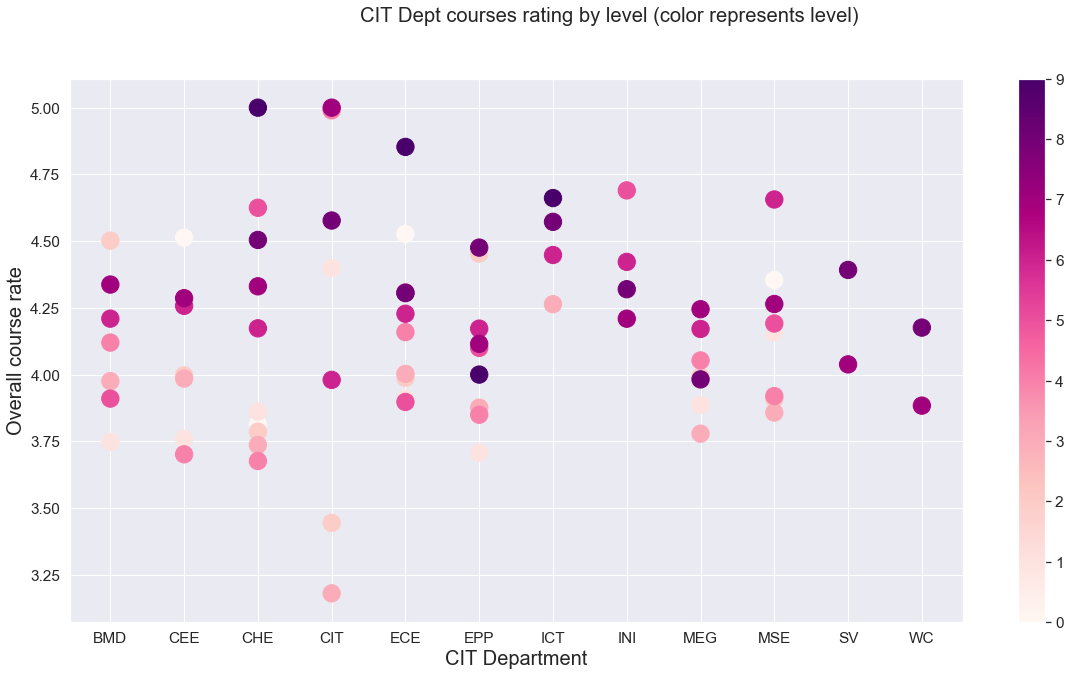

In [349]:
df_dept_plot_CIT = df_dept_plot_selected.loc[df_dept_plot_selected["College"] == " Carnegie Institute of Technology"]
df_dept_plot_CIT
min_ID = df_dept_plot_CIT["Course ID Level"].min()
max_ID = df_dept_plot_CIT["Course ID Level"].max()
print("For CIT,","min_ID =", min_ID, "max_ID=", max_ID)
plt_size = 10
fig, ax = plt.subplots(figsize=(2*plt_size,plt_size))
fig.suptitle('CIT Dept courses rating by level (color represents level)')
ax.set_ylabel("Overall course rate", fontsize=2*plt_size)
ax.set_xlabel("CIT Department", fontsize=2*plt_size)
ax.scatter(df_dept_plot_CIT["Dept"], 
           df_dept_plot_CIT["Overall course rate"], 
           c = df_dept_plot_CIT["Course ID Level"], 
           cmap = "RdPu",s=plt_size*30)

# cite from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=min_ID, vmax=max_ID))
# need to "fake" an array for, otherwise throws an error
sm._A = []
plt.colorbar(sm)
print("Correlation between CIT's Course ID Level and \nOverall Course Rating is",\
      df_dept_plot_CIT['Course ID Level'].corr(df_dept_plot_CIT["Overall course rate"]))
ttest_ind(df_dept_plot_CIT['Course ID Level'], df_dept_plot_CIT["Overall course rate"])

For MCS, min_ID = 1 max_ID= 9
Correlation between MCS's Course ID Level and Overall Course Rating is 0.46360812609350666


Ttest_indResult(statistic=0.6481302861825586, pvalue=0.5190210665797075)

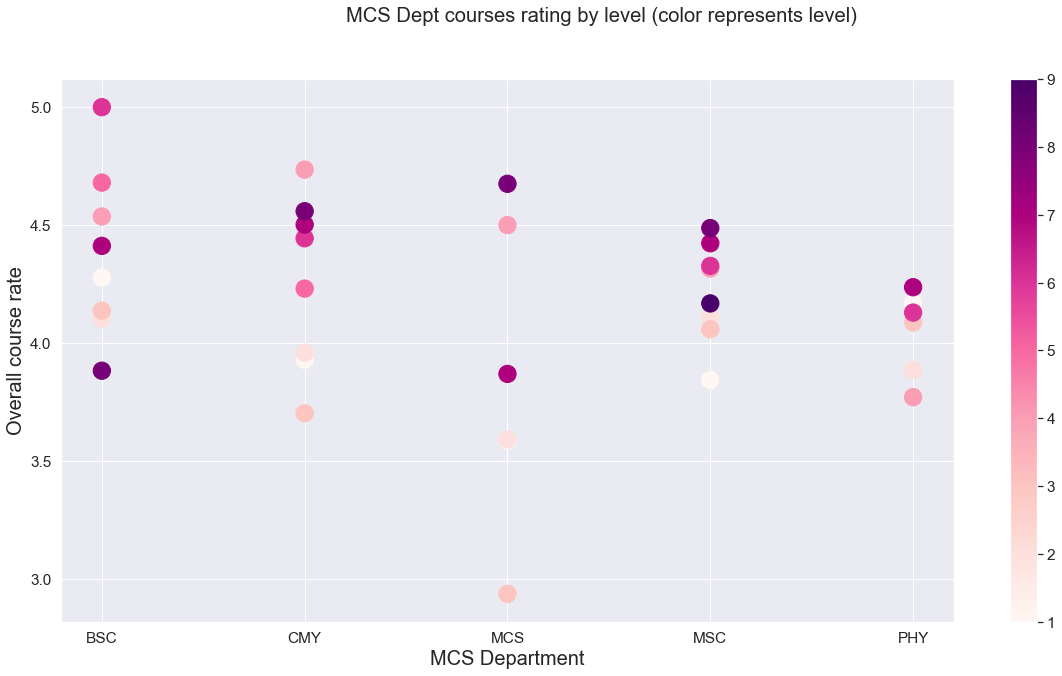

In [350]:
df_dept_plot_MCS = df_dept_plot_selected.loc[df_dept_plot_selected["College"] == " Mellon College of Science"]
df_dept_plot_MCS
min_ID = df_dept_plot_MCS["Course ID Level"].min()
max_ID = df_dept_plot_MCS["Course ID Level"].max()
print("For MCS,","min_ID =", min_ID, "max_ID=", max_ID)
plt_size = 10
fig, ax = plt.subplots(figsize=(2*plt_size,plt_size))
fig.suptitle('MCS Dept courses rating by level (color represents level)')
ax.set_ylabel("Overall course rate", fontsize=2*plt_size)
ax.set_xlabel("MCS Department", fontsize=2*plt_size)
ax.scatter(df_dept_plot_MCS["Dept"], 
           df_dept_plot_MCS["Overall course rate"], 
           c = df_dept_plot_MCS["Course ID Level"], 
           cmap = "RdPu",s=plt_size*30)

# MCSe from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=min_ID, vmax=max_ID))
# need to "fake" an array for, otherwise throws an error
sm._A = []
plt.colorbar(sm)
print("Correlation between MCS's Course ID Level and Overall Course Rating is",\
      df_dept_plot_MCS['Course ID Level'].corr(df_dept_plot_MCS["Overall course rate"]))
ttest_ind(df_dept_plot_MCS['Course ID Level'], df_dept_plot_MCS["Overall course rate"])

For All, min_ID = 0 max_ID= 9
Correlation between All's Course ID Level and Overall Course Rating is 0.28853154749941035


Ttest_indResult(statistic=2.9730476863591964, pvalue=0.0030459169351938816)

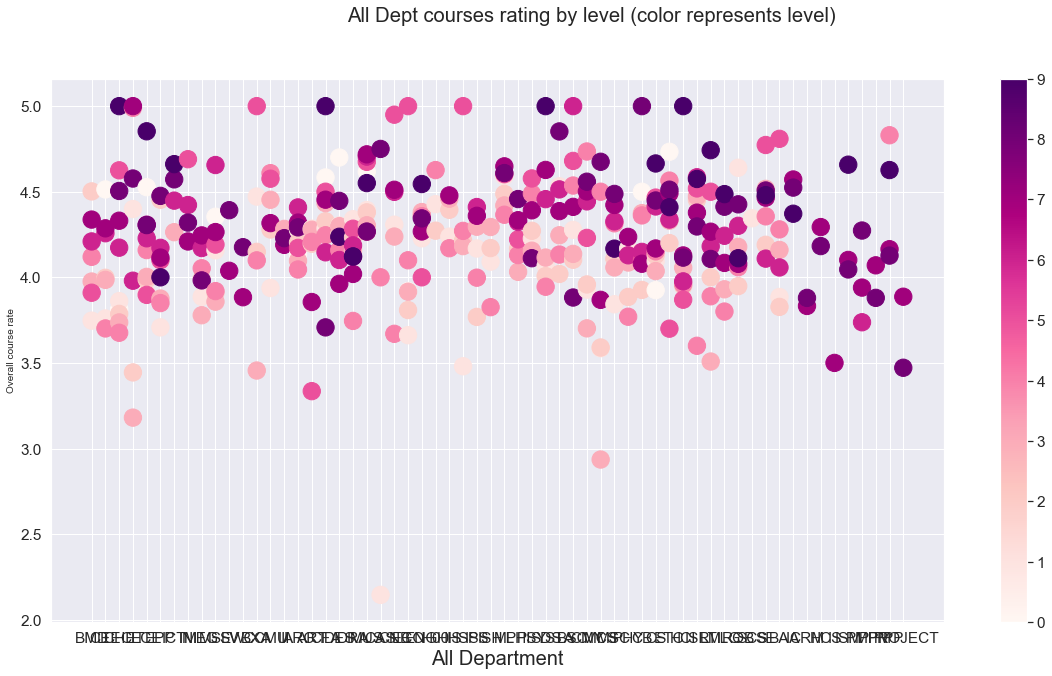

In [354]:
df_dept_plot_All = df_dept_plot_selected.copy()
min_ID = df_dept_plot_All["Course ID Level"].min()
max_ID = df_dept_plot_All["Course ID Level"].max()
print("For All,","min_ID =", min_ID, "max_ID=", max_ID)
plt_size = 10
fig, ax = plt.subplots(figsize=(2*plt_size,plt_size))
fig.suptitle('All Dept courses rating by level (color represents level)')
ax.set_ylabel("Overall course rate", fontsize=plt_size)
ax.set_xlabel("All Department", fontsize=2*plt_size)
ax.scatter(df_dept_plot_All["Dept"], 
           df_dept_plot_All["Overall course rate"], 
           c = df_dept_plot_All["Course ID Level"], 
           cmap = "RdPu",s=plt_size*30)

# Alle from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=min_ID, vmax=max_ID))
# need to "fake" an array for, otherwise throws an error
sm._A = []
plt.colorbar(sm)
print("Correlation between All's Course ID Level and Overall Course Rating is",\
      df_dept_plot_All['Course ID Level'].corr(df_dept_plot_All["Overall course rate"]))
ttest_ind(df_dept_plot_All['Course ID Level'], df_dept_plot_All["Overall course rate"])

Interesting - so it seems that in the scope of all CMU departments, the `Course ID Level` and the `Overall Course Rating` is **positively correlated** with a **statistically significant p-value** of around **0.003**.

In [352]:
# df_dept_plot_Dietrich[df_dept_plot_Dietrich["Dept"]=="CAS"]